<a href="https://colab.research.google.com/github/mongoq/thesis/blob/main/binary_benign_malign_erfi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://github.com/Advay-K/SkinCancerDetection
Overfitting: https://www.youtube.com/watch?v=zPL-rrgDpAY

In [64]:
#! rm -rf /content/SkinCancerDetection/SkinCancerDetection
#! cd /content/
! git clone https://github.com/Advay-K/SkinCancerDetection.git
! 

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: could not create work tree dir 'SkinCancerDetection': No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
pwd: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Activation, Conv2D, Flatten, BatchNormalization, Dropout, Dense, MaxPool2D, MaxPooling2D
import tensorflow as tf

def detect(image):

    path = 'skin_cancer_data'
    train_dir = os.path.join(path, 'train')
    test_dir = os.path.join(path, 'test')
    #train
    train_benign = os.path.join(train_dir, 'benign or not skin cancer')
    train_malignant = os.path.join(train_dir, 'malignant skin cancer')
    #test
    test_benign = os.path.join(test_dir, 'benign or not skin cancer')
    test_malignant = os.path.join(test_dir, 'malignant skin cancer')

    train_img_gen = ImageDataGenerator(rescale = 1./255)
    test_img_gen = ImageDataGenerator(rescale = 1./255)

    generate_train = train_img_gen.flow_from_directory(batch_size=128, directory=train_dir, shuffle=True, target_size = (224, 224),
                                                       class_mode='binary')

    generate_test = test_img_gen.flow_from_directory(batch_size=128, directory=test_dir, target_size = (224, 224), class_mode='binary')

    #neural network

    # model = Sequential([
    #     layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224, 224, 3)),
    #     layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224, 224, 3)),
    #     layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224, 224, 3)),
    #     layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224, 224, 3)),
    #     layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224, 224, 3)),
    #     layers.MaxPooling2D(pool_size = (2, 2)),
    #     layers.Flatten(),
    #     layers.Dense(10, activation= 'relu'),
    #     layers.Dense(1, activation = 'sigmoid')
    # ])

    # --------------------------------------------------------------------------

    # Source: https://github.com/mongoq/thesis/blob/main/skin_cancer_model_97_88_accuracy_erfi_session.ipynb

#     model = Sequential()
#     model.add(Conv2D(16, kernel_size = (3,3), input_shape = (224, 224, 3), activation = 'relu', padding = 'same'))
#     model.add(MaxPool2D(pool_size = (2,2)))

#     model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
#     model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

#     model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
#     model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
#     model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
#     model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

#     model.add(Flatten())
#     model.add(Dense(64, activation = 'relu'))
#     model.add(Dense(32, activation='relu'))
# #    model.add(Dense(7, activation='softmax'))
#     model.add(Dense(1, activation='softmax'))

#     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

#     model.compile(loss = 'sparse_categorical_crossentropy',
#                   optimizer = optimizer,
#                   metrics = ['accuracy'])

# ------------------------------------------------------------------------------
    # model.compile(loss = 'binary_crossentropy',
    #               optimizer = optimizer,
    #                metrics = ['accuracy'])

    # model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    #                 optimizer = optimizer,
    #                  metrics = ['accuracy'])
# ------------------------------------------------------------------------------

# Source: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

    model.summary()

n   # --------------------------------------------------------------------------

    # model.summary()

    # --------------------------------------------------------------------------
    
    # Original 
    #model.compile(optimizer = 'adam', loss = losses.BinaryCrossentropy(), metrics = ['accuracy'])
    #model.summary()

    total_train_size = len(os.listdir(train_benign)) + len(os.listdir(train_malignant))
    total_test_size = len(os.listdir(test_benign)) + len(os.listdir(test_malignant))


    model.fit(generate_train, batch_size = 128, epochs = 5, steps_per_epoch = total_train_size // 128,
              validation_data = generate_test, validation_steps = total_test_size // 128)

    result = model.predict(image)
    return result
    # if result[0][0] == 1:
    #     return 'malignant'
    # else:
    #     return 'benign'
    #
    # return None

In [36]:
cd SkinCancerDetection/

/content/SkinCancerDetection/SkinCancerDetection


In [62]:
!cd /content/SkinCancerDetection/
! pwd
!wget -q https://github.com/Advay-K/SkinCancerDetection/raw/master/skin_cancer_data/train/benign%20or%20not%20skin%20cancer/100.jpg
!wget -q https://github.com/Advay-K/SkinCancerDetection/raw/master/skin_cancer_data/train/malignant%20skin%20cancer/1000.jpg

/content/SkinCancerDetection/SkinCancerDetection


Suspicious image:


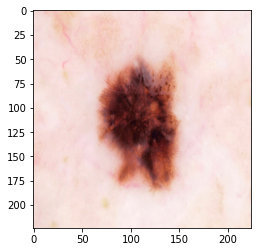

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 activation_31 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 activation_32 (Activation)  (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_75 (MaxPoolin  (None,

In [57]:
import cv2
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
import numpy as np
#from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

#img = image.load_img(os.path.join('smt', 'test_image.png'), target_size=(224, 224))
img = image.load_img('1000.jpg', target_size=(224, 224)) # 100.jpg --> benign !!!

print('Suspicious image:')
plt.imshow(img)
plt.show()

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

#result = detectSkinCancer.detect(img_preprocessed)[0][0]
result = detect(img_preprocessed)[0][0]
#print(result)

if (result > 0.6):
    print('Detection Result: benign :-) --> ', str(result))
else:
    print('Detection Result: malign :-/ --> ', str(result))
